In [1]:
import pandas as pd 
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #gráficos
from scipy.stats.stats import pearsonr #calculos matemáticos e estatísticos
import numpy as np #computação científica

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#define parâmetros estéticos no uso do seaborn
sns.set(style = "darkgrid", color_codes = True) 

In [5]:
#lê os dados
df = pd.read_csv('Dados/merge_usuarios_handset_ibge.csv')

## 1. Caracterização dos dados

### 1.1 Análise de Atributos

* Separação de atributos

In [5]:
#visualizar o total d elinhas e colunas
df.shape

(63300, 87)

In [6]:
#armazenar apenas os dispositivos com preço maior que zero reais
df = df[df['Preço(R$)']>0]

In [7]:
#retornar uma amostra aleatória de dez elementos
df.sample(10)

,#device_id_,latitude_work,longitude_work,geocodigo_setor_work,latitude_home,longitude_home,geocodigo_setor_home,handset,city_ibge_home,city_ibge_work,...,perc_n_pardos,perc_n_pretos,perc_n_idade_0_10,perc_n_idade_11_20,perc_n_idade_21_30,perc_n_idade_31_40,perc_n_idade_41_50,perc_n_idade_51_60,perc_n_idade_61_70,perc_n_idade_71_100
17467,3520935,-23.50196,-46.57336,3.550309e+14,-23.40989,-46.50713,3.518800e+14,LGE:LG-K430,3518800,3550308,...,57.660167,11.142061,25.915493,21.126761,16.338028,18.309859,10.985915,5.352113,1.408451,0.563380
9961,3455278,-2.61859,-44.32001,2.111300e+14,-2.54972,-44.19510,2.111201e+14,motorola:MotoG3,2111201,2111300,...,56.937799,11.961722,15.297907,18.679549,20.289855,23.832528,11.916264,5.152979,2.898551,1.932367
14646,3734304,0.00000,0.00000,0.000000e+00,-22.88084,-43.55868,3.304557e+14,samsung:SM-G610M,3304557,-,...,36.986301,9.105560,9.829407,14.865963,16.084484,15.272136,12.997563,14.622258,11.291633,5.036556
17103,3257355,-18.97483,-49.46203,3.134202e+14,-18.98566,-49.46168,3.134202e+14,LGE:LG-K430,3134202,3134202,...,32.814371,5.508982,11.003628,14.752116,14.993954,13.180169,15.961306,15.356711,8.706167,6.045949
12571,2967183,-16.26914,-47.90689,5.212501e+14,-16.20093,-47.86536,5.212501e+14,samsung:SM-G610M,5212501,5212501,...,61.079169,5.926581,22.447143,22.447143,14.934773,16.869096,11.291048,6.657670,3.508772,1.844354
50387,2223438,0.00000,0.00000,0.000000e+00,-22.31331,-41.71014,3.302403e+14,motorola:Moto G Play,3302403,-,...,43.125904,14.905933,21.991085,15.156018,26.002972,17.087667,11.589896,4.903418,2.228826,1.040119
14814,3789931,0.00000,0.00000,0.000000e+00,-29.88068,-51.71640,4.322004e+14,samsung:SM-G610M,4322004,-,...,10.163934,18.360656,16.000000,24.333333,13.666667,12.000000,17.000000,9.000000,3.333333,4.666667
37785,3002325,-21.18877,-47.80079,3.543402e+14,-21.14565,-47.84566,3.543402e+14,samsung:SM-G570M,3543402,3543402,...,9.610390,2.597403,12.827225,13.350785,24.345550,22.513089,12.827225,8.638743,3.926702,1.570681
43562,3513879,0.00000,0.00000,0.000000e+00,-22.80737,-47.23314,3.552403e+14,samsung:SM-G570M,3552403,-,...,36.596737,4.428904,15.348288,18.063754,20.543093,17.827627,14.285714,8.736718,2.597403,2.597403
20400,2007413,-30.02477,-51.13602,4.314902e+14,-30.02566,-51.09121,4.314902e+14,motorola:Moto E (4) Plus,4314902,4314902,...,16.997792,21.302428,23.068309,24.412094,17.133259,16.013438,11.310190,4.255319,2.463606,1.343785


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63296 entries, 0 to 63299
Data columns (total 87 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   #device_id_                                                     63296 non-null  object 
 1   latitude_work                                                   63296 non-null  float64
 2   longitude_work                                                  63296 non-null  float64
 3   geocodigo_setor_work                                            63296 non-null  float64
 4   latitude_home                                                   63296 non-null  float64
 5   longitude_home                                                  63296 non-null  float64
 6   geocodigo_setor_home                                            63296 non-null  float64
 7   handset                                          

### 1.2 Correlações entre variáveis

In [7]:
#copiar os dados para uma nova varivável para que possamos trabalhar apenas com o setor censitário
df_corr = df

Calcular e analisar os resultados das correlações por Kendall. Escolha do algoritmo pela suposição que os dados não estão distribuídos normalmente.

In [8]:
# https://medium.com/fintechexplained/did-you-know-the-importance-of-finding-correlations-in-data-science-1fa3943debc2
# https://towardsdatascience.com/getting-the-basics-of-correlation-covariance-c8fc110b90b4

df_corr = df_corr.corr('kendall')
df_corr = df_corr[['Preço(R$)']].sort_values(by = ['Preço(R$)'], ascending =  False) #ordena do amior valor para o menor
df_corr

,Preço(R$)
Preço(R$),1.000000
Resolução câmera (Mpx),0.405237
Tamanho tela,0.319171
Processamento (MHz),0.302982
Capacidade Bateria (mAh),0.285914
...,...
media_moradores_por_domicilio,-0.061605
perc_n_idade_11_20,-0.061724
perc_n_idade_0_10,-0.062061
variancia_moradores_por_domicilio,-0.063291


Correlações positivas:

In [11]:
df_corr.iloc[:38]

,Preço(R$)
Preço(R$),1.000000
Resolução câmera (Mpx),0.405291
Tamanho tela,0.319283
Processamento (MHz),0.303091
Capacidade Bateria (mAh),0.286019
Peso (g),0.247215
Memória RAM (GB),0.245447
Bluetooth,0.096901
Avaliação Usuario,0.091438
media_rendimento_medio_por_morador_com_ou_sem_renda,0.083886


Soma das correlações positivas

In [12]:
#cumsum -> retorna uma soma cumulativa em um determinado eixo
df_corr.iloc[1:38].cumsum(axis = 0).iloc[-1:].values[0][0]

3.3065331775512266

Correlações negativas:

In [13]:
df_corr.iloc[38:].sort_values(by = 'Preço(R$)', ascending =  True)

,Preço(R$)
perc_n_pardos,-0.070385
variancia_moradores_por_domicilio,-0.063312
perc_n_idade_0_10,-0.062027
perc_n_idade_11_20,-0.061675
media_moradores_por_domicilio,-0.061612
latitude_home,-0.056547
n_pardos,-0.055504
latitude_work,-0.044601
n_idade_0_10,-0.044339
n_idade_11_20,-0.039619


Soma das correlações negativas

In [14]:
df_corr.iloc[-19:].cumsum(axis = 0).iloc[-1:].values[0][0]

-0.8142444966605761

In [15]:
for i,c in enumerate(df.columns):
    print(f"\033[92;1m * \033[mColumn {i}: {c}")

 * Column 0: #device_id_
 * Column 1: latitude_work
 * Column 2: longitude_work
 * Column 3: geocodigo_setor_work
 * Column 4: latitude_home
 * Column 5: longitude_home
 * Column 6: geocodigo_setor_home
 * Column 7: handset
 * Column 8: city_ibge_home
 * Column 9: city_ibge_work
 * Column 10: nome comercial
 * Column 11: Marca
 * Column 12: Modelo
 * Column 13: Capacidade Bateria (mAh)
 * Column 14: Memória RAM (GB)
 * Column 15: Memória Armazenamento(GB)
 * Column 16: Bluetooth
 * Column 17: NFC
 * Column 18: Dual chip
 * Column 19: LTE
 * Column 20: Resolução câmera (Mpx)
 * Column 21: Peso (g)
 * Column 22: Dimensões (larguraxalturaxespessura)
 * Column 23: Tamanho tela
 * Column 24: Sistema Operacional
 * Column 25: Versão SO
 * Column 26: Processamento (MHz)
 * Column 27: Link das fontes
 * Column 28: Data atualização
 * Column 29: Ano lançamento
 * Column 30: Preço(R$)
 * Column 31: Avaliação Site
 * Column 32: Avaliação Usuario
 * Column 33: Cod_bairro
 * Column 34: Cod_distrito

### 1.3 Feature engineering

In [9]:
#remover atributos desnecessários para a análise dos dados, no caso foram excluídos atributos do aparelho e do setor censitário

remover_atributos = [
    'Capacidade Bateria (mAh)','Modelo', 'Memória RAM (GB)','Marca','Sistema Operacional',\
    'Bluetooth', 'Resolução câmera (Mpx)', 'Peso (g)', 'Tamanho tela',\
    'Processamento (MHz)', 'Cod_setor','Avaliação Site',\
    'Memória Armazenamento(GB)','Avaliação Usuario','LTE','Dual chip','NFC',\
    'Nome_Grande_Regiao','geocodigo_setor_home','Nome_do_municipio','Nome_da_UF','Nome_do_subdistrito',\
    'nome comercial','Dimensões (larguraxalturaxespessura)',\
    '#device_id_', 'handset', 'city_ibge_work', 'Link das fontes',\
    'Data atualização', 'Cod_municipio','Versão SO',\
    'latitude_work', 'longitude_work', 'geocodigo_setor_work', \
    'latitude_home', 'longitude_home','Ano lançamento', \
    'city_ibge_home','Cod_bairro', 'Cod_distrito', 'Cod_meso', \
    'Cod_subdistrito','Situacao_setor','Tipo_setor'
]

df.drop(columns = remover_atributos, inplace = True)
df

,Preço(R$),media_moradores_por_domicilio,media_rendimento_medio_por_morador_com_ou_sem_renda,media_rendimento_medio_por_morador_com_renda,media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda,media_rendimento_medio_por_morador_responsavel_com_renda,n_alfabetizados_homens,n_alfabetizados_mulheres,n_amarelos,n_brancos,...,perc_n_pardos,perc_n_pretos,perc_n_idade_0_10,perc_n_idade_11_20,perc_n_idade_21_30,perc_n_idade_31_40,perc_n_idade_41_50,perc_n_idade_51_60,perc_n_idade_61_70,perc_n_idade_71_100
0,889.9900,2.95,633.29,995.84,1081.69,1121.34,579.0,700.0,32.0,517.0,...,58.311170,5.186170,14.759648,14.488829,26.675694,20.649966,10.629655,6.635071,2.708192,3.452945
1,493.0000,2.95,633.29,995.84,1081.69,1121.34,579.0,700.0,32.0,517.0,...,58.311170,5.186170,14.759648,14.488829,26.675694,20.649966,10.629655,6.635071,2.708192,3.452945
2,1350.0000,2.95,633.29,995.84,1081.69,1121.34,579.0,700.0,32.0,517.0,...,58.311170,5.186170,14.759648,14.488829,26.675694,20.649966,10.629655,6.635071,2.708192,3.452945
3,889.9900,3.18,375.89,529.26,382.53,474.78,502.0,541.0,0.0,219.0,...,55.048860,27.117264,17.000000,16.833333,21.250000,18.250000,11.333333,9.083333,4.333333,1.916667
4,699.0000,3.18,375.89,529.26,382.53,474.78,502.0,541.0,0.0,219.0,...,55.048860,27.117264,17.000000,16.833333,21.250000,18.250000,11.333333,9.083333,4.333333,1.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,0.0000,2.99,630.70,953.44,1018.04,1100.27,359.0,371.0,1.0,708.0,...,8.442331,7.253270,15.898058,16.990291,17.111650,18.689320,12.257282,10.194175,5.825243,3.033981
63296,0.0000,3.50,510.15,783.68,768.14,901.25,471.0,507.0,3.0,296.0,...,60.211268,13.028169,18.772242,20.462633,17.081851,17.348754,13.523132,7.473310,3.558719,1.779359
63297,488.0000,3.21,420.68,627.27,649.07,708.08,206.0,218.0,1.0,251.0,...,42.461005,13.864818,14.210526,20.877193,14.385965,14.736842,13.508772,8.245614,8.245614,5.789474
63298,1873.2685,3.83,925.38,1309.50,1259.58,1483.32,285.0,329.0,24.0,393.0,...,32.215743,6.997085,12.536873,14.601770,17.551622,14.749263,12.979351,12.389381,6.932153,8.259587


In [10]:
df.columns

Index(['Preço(R$)', 'media_moradores_por_domicilio',
       'media_rendimento_medio_por_morador_com_ou_sem_renda',
       'media_rendimento_medio_por_morador_com_renda',
       'media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda',
       'media_rendimento_medio_por_morador_responsavel_com_renda',
       'n_alfabetizados_homens', 'n_alfabetizados_mulheres', 'n_amarelos',
       'n_brancos', 'n_domicilios', 'n_homens', 'n_idade_0_10',
       'n_idade_11_20', 'n_idade_21_30', 'n_idade_31_40', 'n_idade_41_50',
       'n_idade_51_60', 'n_idade_61_70', 'n_idade_71_100', 'n_indigenas',
       'n_moradores', 'n_mulheres', 'n_pardos', 'n_pretos',
       'variancia_moradores_por_domicilio', 'perc_n_mulheres', 'perc_n_homens',
       'perc_n_mulheres_alfabetizados', 'perc_n_homens_alfabetizados',
       'perc_n_amarelos', 'perc_n_brancos', 'perc_n_indigenas',
       'perc_n_pardos', 'perc_n_pretos', 'perc_n_idade_0_10',
       'perc_n_idade_11_20', 'perc_n_idade_21_30', 'perc_n_idade_

In [18]:
percentuais = ['perc_n_mulheres', 'perc_n_homens', 
               'perc_n_mulheres_alfabetizados','perc_n_homens_alfabetizados',
               'perc_n_amarelos','perc_n_brancos','perc_n_indigenas','perc_n_pardos',
               'perc_n_pretos','perc_n_idade_0_10','perc_n_idade_11_20','perc_n_idade_21_30',
               'perc_n_idade_31_40','perc_n_idade_41_50','perc_n_idade_51_60',
               'perc_n_idade_61_70','perc_n_idade_71_100']

In [19]:
# Remove os atributos de percentual para teste
#df.drop(columns = percentuais,inplace=True)

In [20]:
originais = ['n_alfabetizados_homens', 'n_alfabetizados_mulheres', 'n_amarelos',
       'n_brancos', 'n_domicilios', 'n_homens', 'n_idade_0_10',
       'n_idade_11_20', 'n_idade_21_30', 'n_idade_31_40', 'n_idade_41_50',
       'n_idade_51_60', 'n_idade_61_70', 'n_idade_71_100', 'n_indigenas',
       'n_moradores', 'n_mulheres', 'n_pardos', 'n_pretos'
]

In [21]:
# Remove os atributos de originais para teste
#df.drop(columns = originais,inplace=True)

O site de tecnologia Tech Tudo é um site da rede de televisão Globo que tem como objetivo abordar assuntos de tecnologia como jogos, celulares, softwares, eletrônicos, TV e internet. Em um especial publicitário de 28/03/2019, o mesmo se juntou a empresa transnacional de tecnologia Amazon para estudar as faixas de preço de smartphones com base nas avaliações dos clientes Amazon junto com os reviews da Techtudo. Sendo assim, eles dividiram os smartphones em modelos básicos, intermediário e intermediário premium.

Os celulares básicos permitem geralmente utilizar aplicativos de mensagens, redes sociais, mapa e musicas. Logo, pode-se encontrar modelos simples cercando 500 reais.

O celulares intermediários permitem geralmente utilizar redes sociais, tira fotos, grava vídeos, tem mais memória, câmeras melhores e são um pouco mais rápidos. Logo, eles abrangem a faixa de 500 a mil reais.

O celulares premium possuem telas melhores, câmeras de ótima resolução para fotos e vídeos, mais espaço de armazenamento e muito boa performance. Logo, eles ocupam a faixa de preço de mil a 2,5 mil reais. Entretanto, celulares com preços bem elevados são chamados de premium pelo Techtudo mas é mencionado que são celulares destinados para quem quer um aparelho sem travamentos e para quem quer ter apenas a satisfação de ter um celular premium, com as melhores especificações disponíveis na atualidade.

Contudo, para realizar esta análise em 4 classes de preço como barato, moderado, cato e muito caro, utilizou-se esta notícia como base para realizar as separações. Sendo assim, optou-se por manter as faixas de preço do especial publicitário e acrescentar a classe 'muito caro' para celulares acima de 2,5 mil reais.

site https://www.techtudo.com.br/listas/2019/03/melhores-smartphones-em-todas-as-faixas-de-preco-em-2019.ghtml

In [13]:
#Flag para sinalizar se foi tirado do site ou não
flag = True

In [14]:
def classe_preco(data):
    #Classes de preços retirados do site
    if flag == True:
        if data <500:
            return 'barato'
        elif (data>=500) & (data<1000):
            return 'moderado'
        elif (data>=1000) & (data<2500):
            return 'caro'
        else:
            return 'muito caro'
    else:
    #Classe separadas pro quartis
        if data <651:
            return 'barato'
        elif (data>=650) & (data<826):
            return 'moderado'
        elif (data>=826) & (data<922):
            return 'caro'
        else:
            return 'muito caro'

In [15]:
df['classe_preco'] = ''
df['classe_preco'] = df["Preço(R$)"].apply(classe_preco)

### 1.4 Gráficos

#### Boxplot de preços

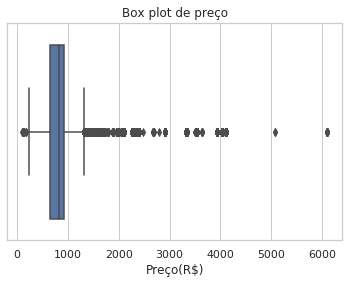

In [25]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df['Preço(R$)'])
plt.title("Box plot de preço")
plt.show()

In [26]:
df['Preço(R$)'].describe()

count    63296.000000
mean       836.007691
std        398.804107
min        110.000000
25%        650.100000
50%        825.550000
75%        921.400000
max       6088.008500
Name: Preço(R$), dtype: float64

In [16]:
#atributos para fazer correlação par-a-par
atributos_corr = [
       'Preço(R$)', 'media_moradores_por_domicilio',\
       'media_rendimento_medio_por_morador_com_ou_sem_renda',\
       'media_rendimento_medio_por_morador_com_renda',\
       'media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda',\
       'media_rendimento_medio_por_morador_responsavel_com_renda',\
       'n_alfabetizados_homens', 'n_alfabetizados_mulheres', 'n_amarelos',\
       'n_brancos', 'n_domicilios', 'n_homens', 'n_idade_0_10',\
       'n_idade_11_20', 'n_idade_21_30', 'n_idade_31_40', 'n_idade_41_50',\
       'n_idade_51_60', 'n_idade_61_70', 'n_idade_71_100', 'n_indigenas',\
       'n_moradores', 'n_mulheres', 'n_pardos', 'n_pretos',\
       'variancia_moradores_por_domicilio', 'perc_n_mulheres', 'perc_n_homens',\
       'perc_n_mulheres_alfabetizados', 'perc_n_homens_alfabetizados',\
       'perc_n_amarelos', 'perc_n_brancos', 'perc_n_indigenas',\
       'perc_n_pardos', 'perc_n_pretos', 'perc_n_idade_0_10',\
       'perc_n_idade_11_20', 'perc_n_idade_21_30', 'perc_n_idade_31_40',\
       'perc_n_idade_41_50', 'perc_n_idade_51_60', 'perc_n_idade_61_70',\
       'perc_n_idade_71_100'
]

<b>Gráfico de correlação de todas as variáveis que são características do setor e numérica</b>

Interpretando o valor de ρ
<ul>
<li>0.9 a 1 positivo ou negativo indica uma correlação muito forte.</li>
<li>0.7 a 0.9 positivo ou negativo indica uma correlação forte.</li>
<li>0.5 a 0.7 positivo ou negativo indica uma correlação moderada.</li>
<li>0.3 a 0.5 positivo ou negativo indica uma correlação fraca.</li>
<li>0 a 0.3 positivo ou negativo indica uma correlação desprezível.</li>
</ul>

Preço(R$)


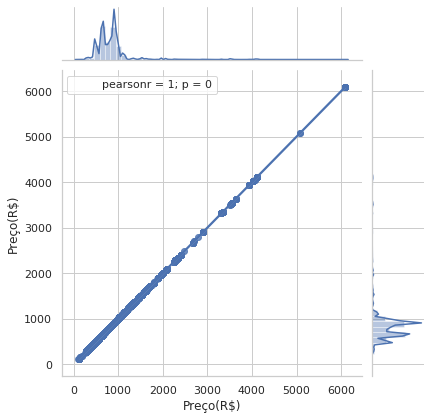

media_moradores_por_domicilio


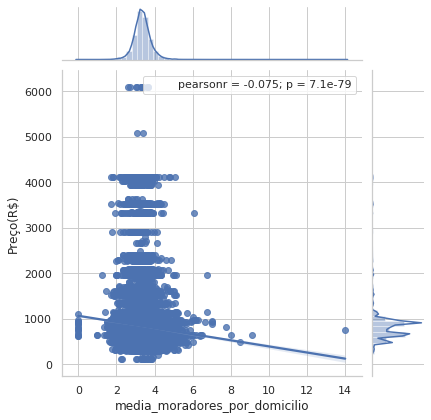

media_rendimento_medio_por_morador_com_ou_sem_renda


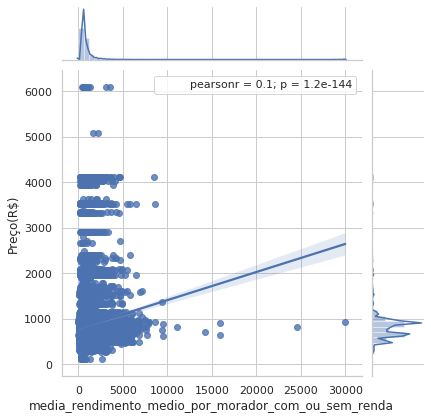

media_rendimento_medio_por_morador_com_renda


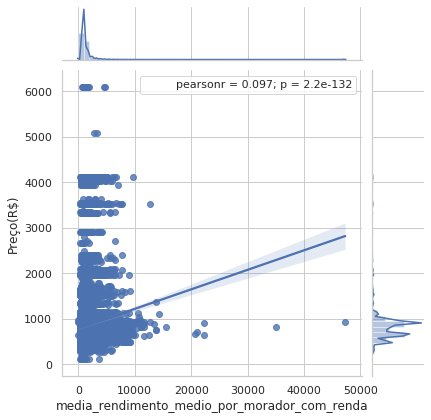

media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda


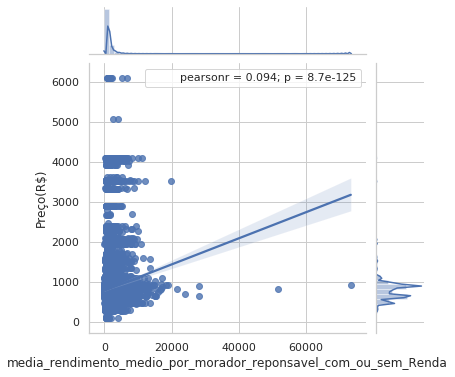

media_rendimento_medio_por_morador_responsavel_com_renda


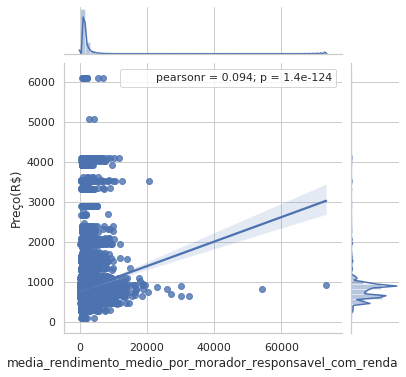

n_alfabetizados_homens


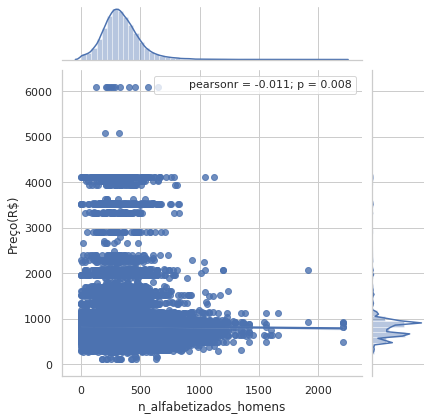

n_alfabetizados_mulheres


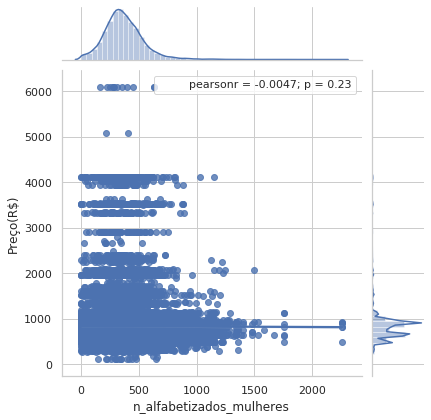

n_amarelos


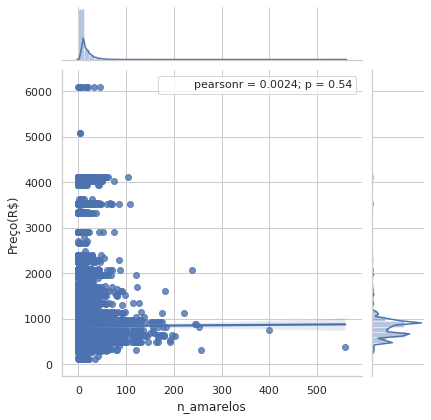

n_brancos


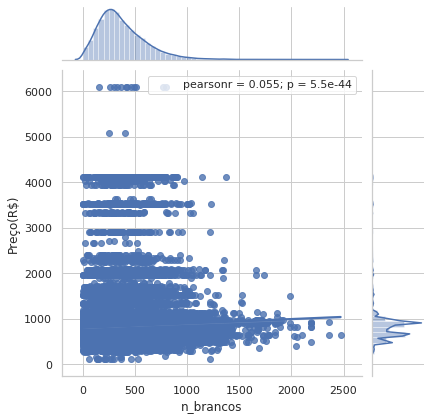

n_domicilios


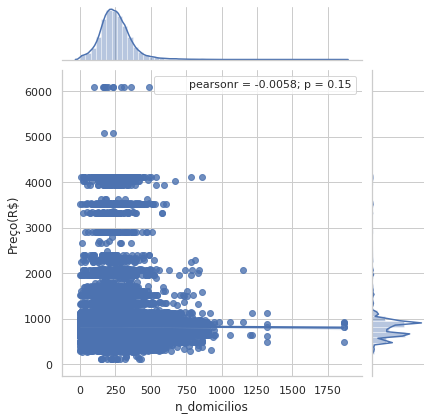

n_homens


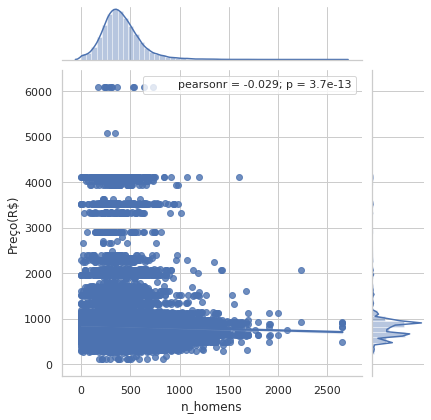

n_idade_0_10


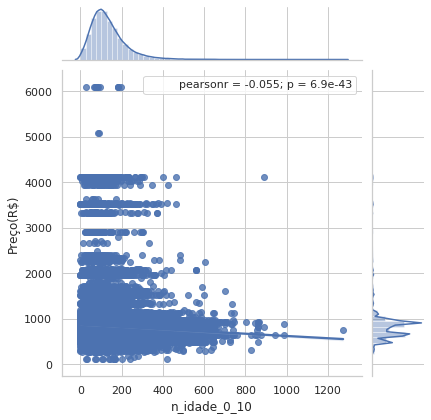

n_idade_11_20


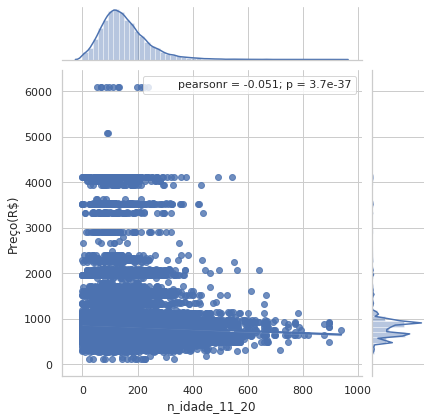

n_idade_21_30


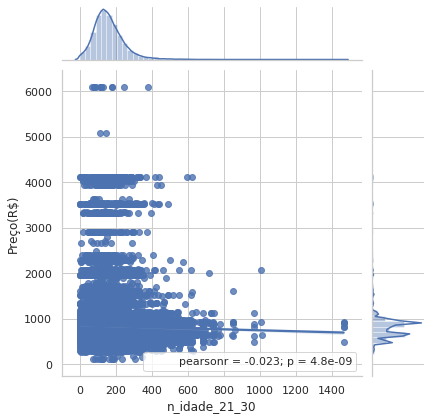

n_idade_31_40


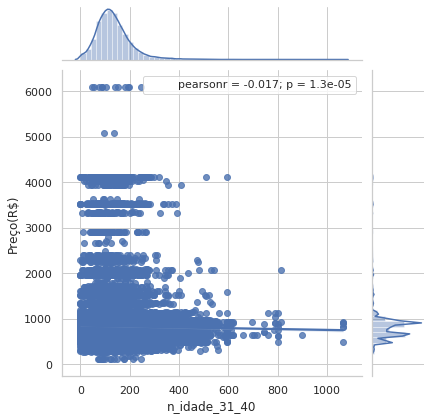

n_idade_41_50


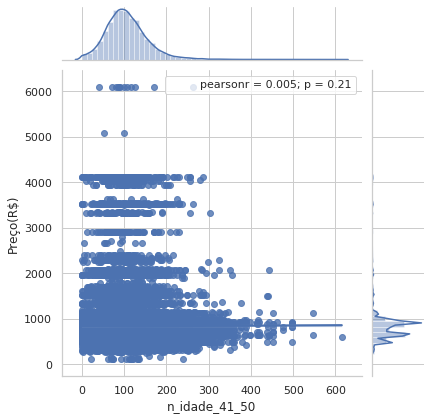

n_idade_51_60


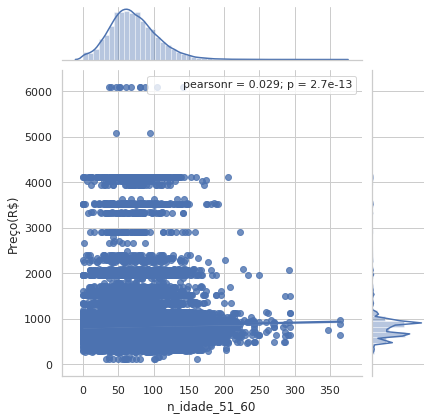

n_idade_61_70


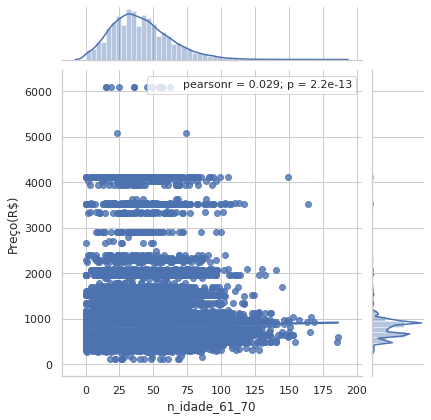

n_idade_71_100


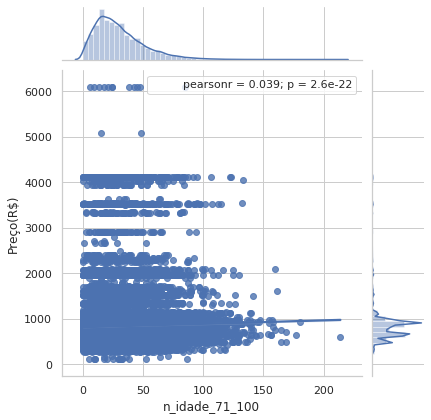

n_indigenas


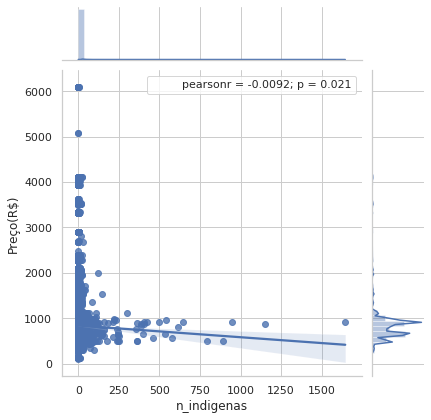

n_moradores


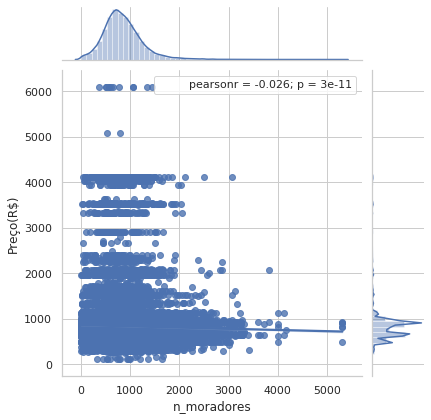

n_mulheres


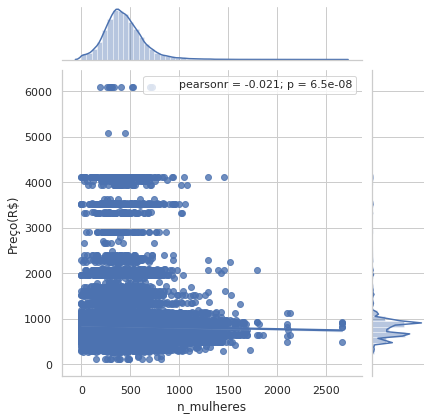

n_pardos


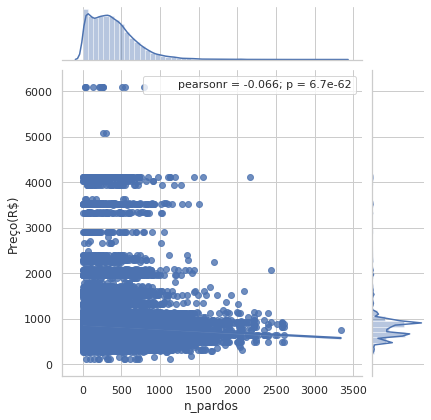

n_pretos


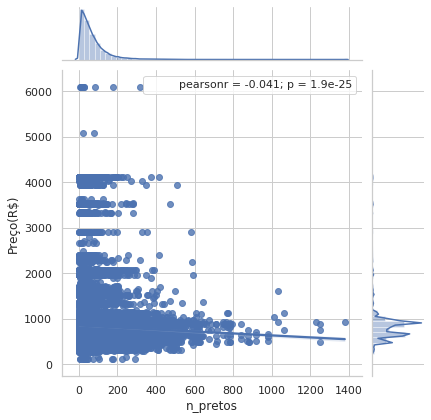

variancia_moradores_por_domicilio


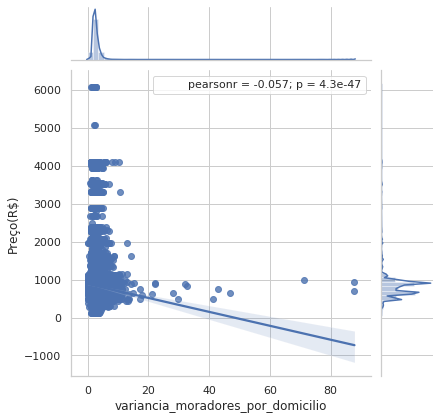

perc_n_mulheres


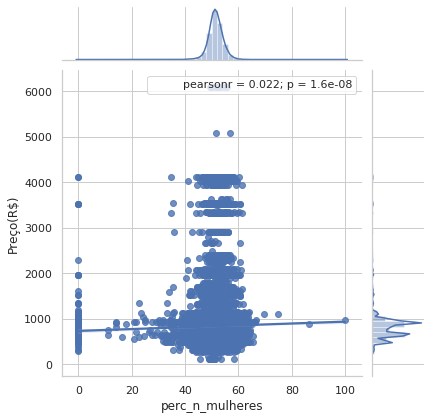

perc_n_homens


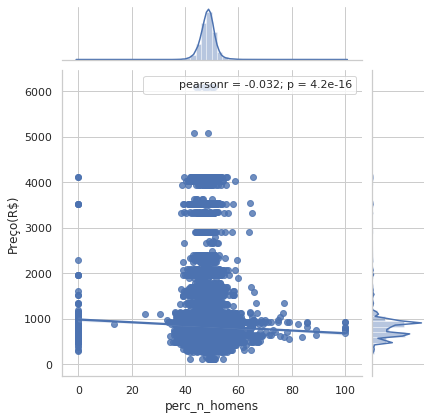

perc_n_mulheres_alfabetizados


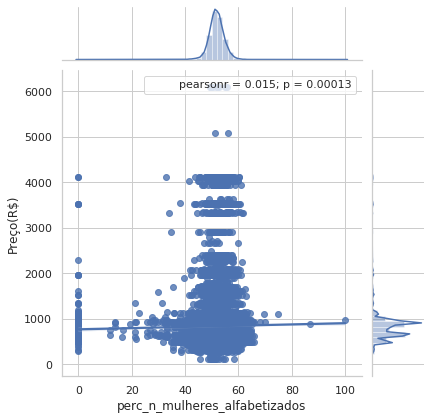

perc_n_homens_alfabetizados


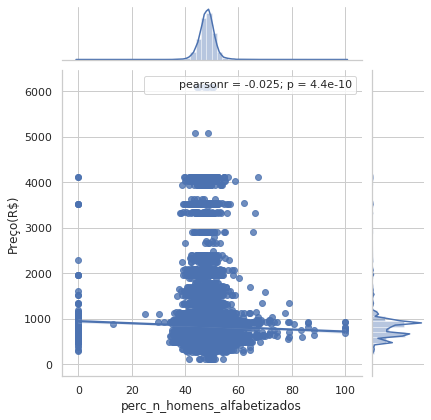

perc_n_amarelos


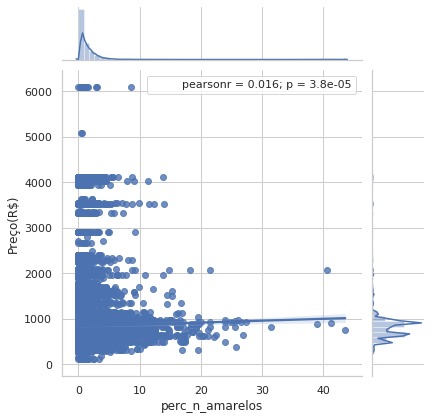

perc_n_brancos


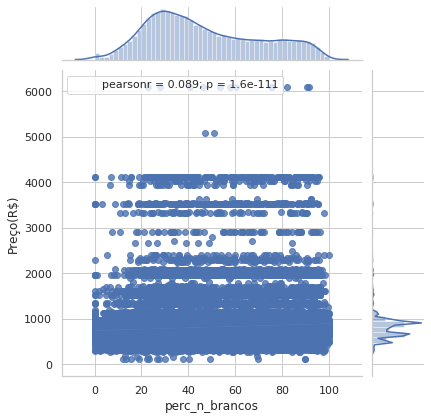

perc_n_indigenas


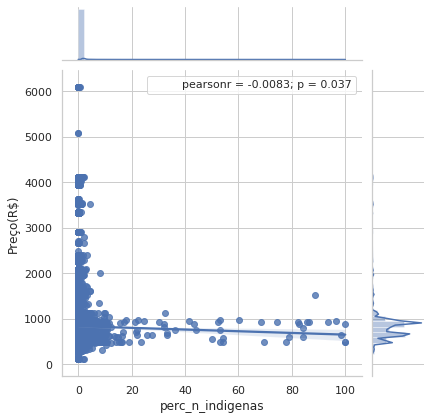

perc_n_pardos


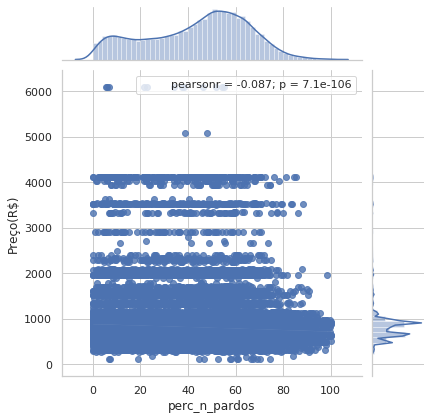

perc_n_pretos


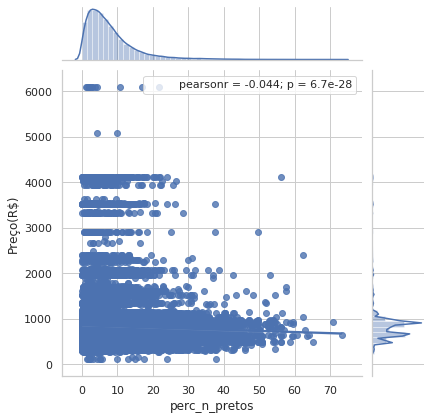

perc_n_idade_0_10


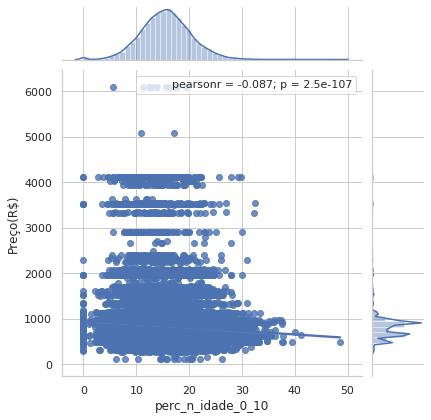

perc_n_idade_11_20


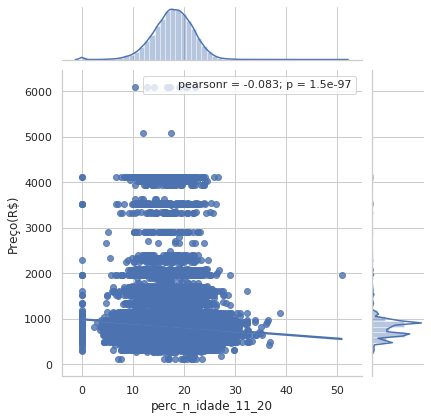

perc_n_idade_21_30


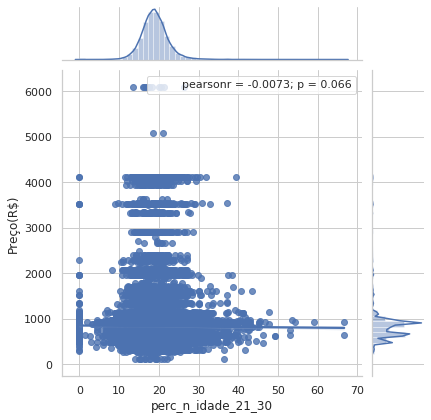

perc_n_idade_31_40


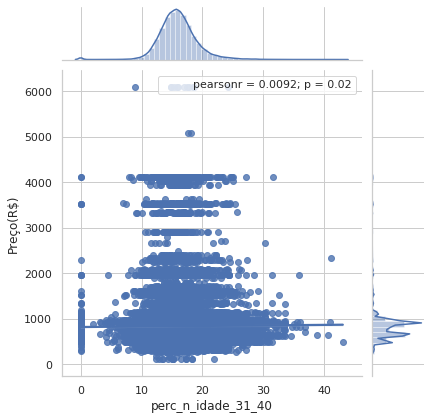

perc_n_idade_41_50


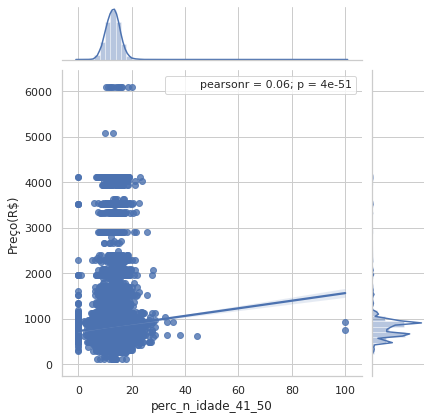

perc_n_idade_51_60


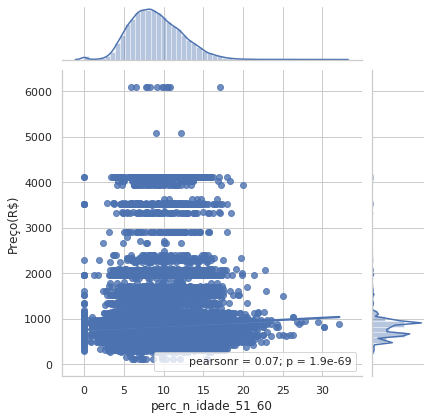

perc_n_idade_61_70


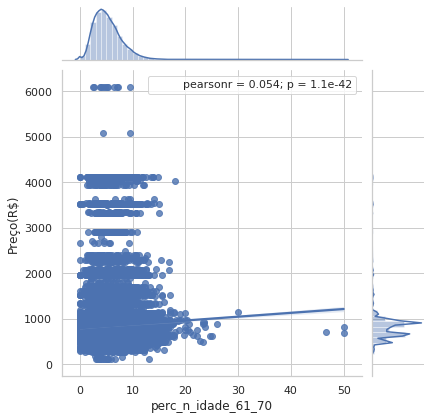

perc_n_idade_71_100


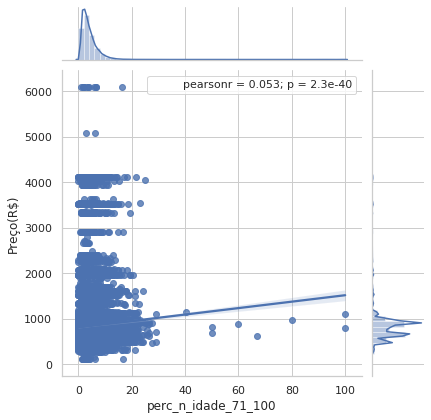

In [28]:
for data in atributos_corr:
    print(data)
    sns.jointplot(data,"Preço(R$)", data = df, kind = "reg").annotate(pearsonr)
    plt.show()

## 2. Elaboração dos Modelos

Acurácia -> A acurácia é a proximidade de um resultado com o seu valor de referência real. Dessa forma, quanto maior a acurácia, mais próximo da referência ou valor real é o resultado encontrado.

### 2.1 Preparação dos dados

### Label encoding

Label enconding -> maneira de categorizar os dados que não são text

In [19]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder -> Codifique os rótulos de destino com valor entre 0 e n_classes-1.

In [20]:
#Instanciar o objeto
lab = LabelEncoder()

In [21]:
#Ajustar e transformar os dados
df['classe_preco'] = lab.fit_transform(df['classe_preco'])

In [32]:
#for coluna in cols:
#    df[coluna] = lab.fit_transform(df[coluna])

In [22]:
df.drop(columns = ['classe_preco', 'Preço(R$)'])

,media_moradores_por_domicilio,media_rendimento_medio_por_morador_com_ou_sem_renda,media_rendimento_medio_por_morador_com_renda,media_rendimento_medio_por_morador_reponsavel_com_ou_sem_Renda,media_rendimento_medio_por_morador_responsavel_com_renda,n_alfabetizados_homens,n_alfabetizados_mulheres,n_amarelos,n_brancos,n_domicilios,...,perc_n_pardos,perc_n_pretos,perc_n_idade_0_10,perc_n_idade_11_20,perc_n_idade_21_30,perc_n_idade_31_40,perc_n_idade_41_50,perc_n_idade_51_60,perc_n_idade_61_70,perc_n_idade_71_100
0,2.95,633.29,995.84,1081.69,1121.34,579.0,700.0,32.0,517.0,509.0,...,58.311170,5.186170,14.759648,14.488829,26.675694,20.649966,10.629655,6.635071,2.708192,3.452945
1,2.95,633.29,995.84,1081.69,1121.34,579.0,700.0,32.0,517.0,509.0,...,58.311170,5.186170,14.759648,14.488829,26.675694,20.649966,10.629655,6.635071,2.708192,3.452945
2,2.95,633.29,995.84,1081.69,1121.34,579.0,700.0,32.0,517.0,509.0,...,58.311170,5.186170,14.759648,14.488829,26.675694,20.649966,10.629655,6.635071,2.708192,3.452945
3,3.18,375.89,529.26,382.53,474.78,502.0,541.0,0.0,219.0,386.0,...,55.048860,27.117264,17.000000,16.833333,21.250000,18.250000,11.333333,9.083333,4.333333,1.916667
4,3.18,375.89,529.26,382.53,474.78,502.0,541.0,0.0,219.0,386.0,...,55.048860,27.117264,17.000000,16.833333,21.250000,18.250000,11.333333,9.083333,4.333333,1.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63295,2.99,630.70,953.44,1018.04,1100.27,359.0,371.0,1.0,708.0,281.0,...,8.442331,7.253270,15.898058,16.990291,17.111650,18.689320,12.257282,10.194175,5.825243,3.033981
63296,3.50,510.15,783.68,768.14,901.25,471.0,507.0,3.0,296.0,325.0,...,60.211268,13.028169,18.772242,20.462633,17.081851,17.348754,13.523132,7.473310,3.558719,1.779359
63297,3.21,420.68,627.27,649.07,708.08,206.0,218.0,1.0,251.0,180.0,...,42.461005,13.864818,14.210526,20.877193,14.385965,14.736842,13.508772,8.245614,8.245614,5.789474
63298,3.83,925.38,1309.50,1259.58,1483.32,285.0,329.0,24.0,393.0,179.0,...,32.215743,6.997085,12.536873,14.601770,17.551622,14.749263,12.979351,12.389381,6.932153,8.259587


In [23]:
#Exclui as variáveis target e o preço
X = df.drop(columns = ['classe_preco', 'Preço(R$)']).values
y = df['classe_preco'].astype('int64').values.ravel() #a matriz retornada terá o mesmo tipo da matriz de entrada

In [24]:
from sklearn.model_selection import train_test_split
#divide matrizes em subconjuntos aleatórios de treino e teste

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [26]:
y_train

array([2, 2, 0, ..., 2, 2, 2])

In [27]:
y_test

array([2, 2, 2, ..., 2, 1, 2])

Os modelos abaixo possuem acurácia, precisão, revocação e matriz de confusão.

In [37]:
from sklearn.metrics import confusion_matrix #importação da matriz de confusão

In [38]:
from yellowbrick.classifier import ConfusionMatrix #gráfico de matriz de confusão
def matriz_confusao(model):
    confusion_matrix(y_pred, y_test)
    cm = ConfusionMatrix(model,classes = classes)
    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

### 2.2.1 Implementação no Modelo - Regressão Logistica

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression

In [40]:
logistic = LogisticRegression()

In [41]:
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = logistic.predict(X_test)

In [43]:
print("Acurácia Regressão Logística",accuracy_score(y_pred, y_test))

Acurácia Regressão Logística 0.7638835695135964


In [44]:
#Precision -> Porcentagem das identificações positivas as quais foram corretas
print("Precisão Regressão Logística",precision_score(y_pred, y_test,average=None))

Precisão Regressão Logística [0.00109609 0.00206825 0.99731116 0.        ]


In [45]:
#Recall -> Porcentagem do quanto o modelo conseguiu acertar positivamento as classes
print("Recall Regressão Logística",recall_score(y_pred, y_test,average=None))

Recall Regressão Logística [0.14285714 0.125      0.76567451 0.        ]


In [46]:
classes = ['barato','moderado','caro' ,'muito caro']

In [47]:
modelos = ['logistic','decision_tree','bagging','random_forest','clf']

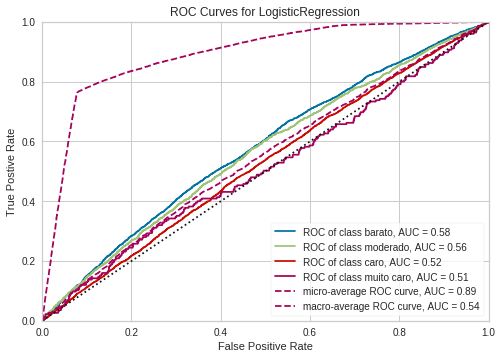

In [48]:
#Curva ROC e Area Abaixo da Curva
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam

visualizer = ROCAUC(logistic, classes = classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

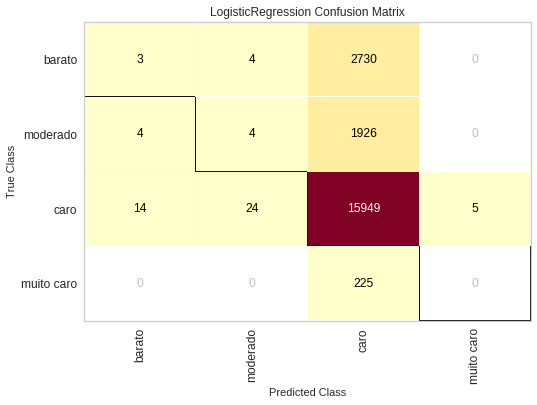

In [49]:
matriz_confusao(logistic)

### 2.2.2 Implementação no modelo - Árvore de decisão

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
decision_tree = DecisionTreeClassifier(max_depth=10)

In [52]:
decision_tree_fitted = decision_tree.fit(X_train, y_train)

In [53]:
y_pred = decision_tree.predict(X_test)

In [54]:
print("Acurácia Árvore de decisão",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão 0.7556491765607047


In [55]:
print("Precisão Árvore de decisão",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão [0.01790281 0.00465357 0.98336668 0.        ]


In [56]:
print("Recall Árvore de decisão",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão [0.16666667 0.12857143 0.76626224 0.        ]


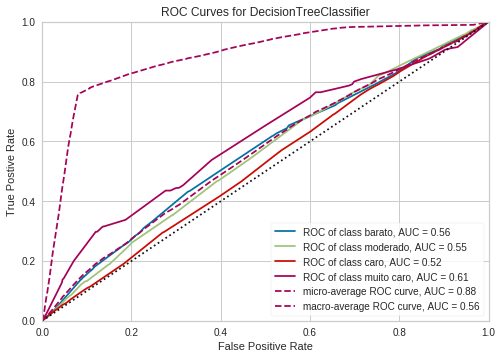

In [57]:
visualizer = ROCAUC(decision_tree, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()
plt.show()

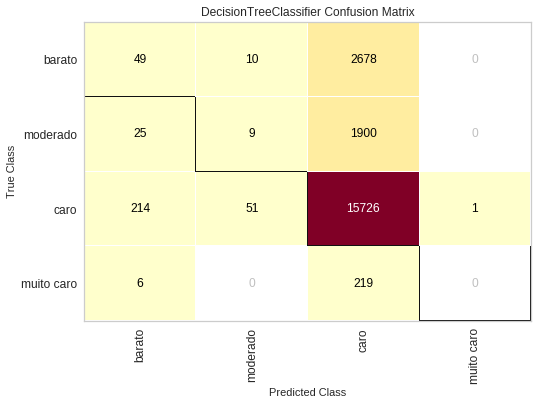

In [58]:
matriz_confusao(decision_tree)

###  2.2.3 Implementação no Modelo - Baggin (Árvore de decisão)

In [59]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [60]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True)

In [61]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


In [62]:
y_pred = bagging.predict(X_test)

In [63]:
print("Acurácia Árvore de decisão (Baggin)",accuracy_score(y_pred, y_test))

Acurácia Árvore de decisão (Baggin) 0.7652240520873229


In [64]:
print("Precisão Árvore de decisão (Baggin)",precision_score(y_pred, y_test,average=None))

Precisão Árvore de decisão (Baggin) [0.         0.         0.99949975 0.        ]


In [65]:
print("Recall Árvore de decisão (Baggin)",recall_score(y_pred, y_test,average=None))

Recall Árvore de decisão (Baggin) [0.         0.         0.76551724 0.        ]


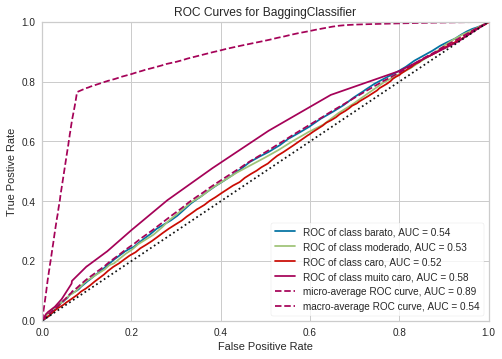

In [66]:
visualizer = ROCAUC(bagging, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

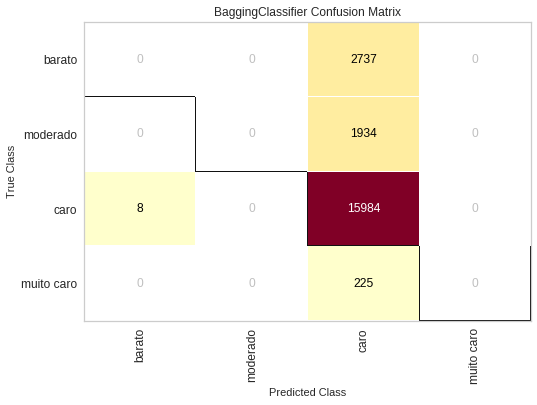

In [67]:
matriz_confusao(bagging)

### 2.2.4 2.2 Implementação no Modelo - Random forest

In [68]:
random_forest = RandomForestClassifier(n_estimators=500)

In [69]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
y_pred = random_forest.predict(X_test)

In [71]:
print("Acurácia Random Forest",accuracy_score(y_pred, y_test))

Acurácia Random Forest 0.7337705859823822


In [72]:
print("Precisão Random Forest",precision_score(y_pred, y_test,average=None))

Precisão Random Forest [0.03178663 0.02430196 0.94997499 0.00444444]


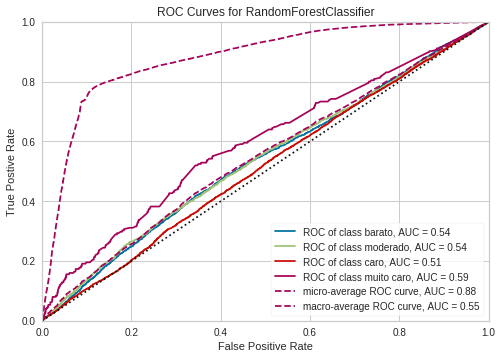

In [73]:
visualizer = ROCAUC(random_forest, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

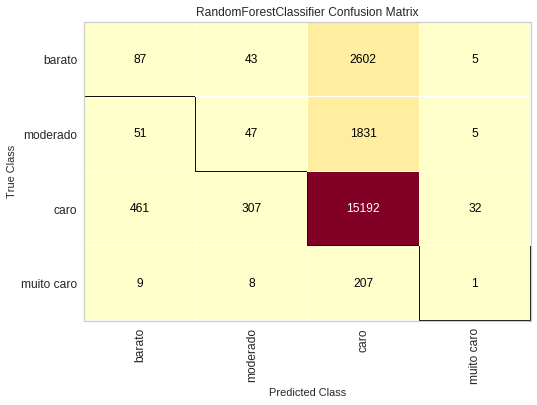

In [74]:
matriz_confusao(random_forest)

### 2.2 Implementação no Modelo - KNN

<b>n_neighbors</b>

In [75]:
from sklearn.neighbors import KNeighborsClassifier

<b>n_neighbors</b>, ajustar o número de vizinhos para melhor precisão

In [76]:
n_neighbors = [1,5,10,15,20,25,30,
               35,40,60,80,100,150,
               200,400,600,800,1000,
              1500,2000,2500]
scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    print("\n")

N vizinhos  1
Precisão KNN [0.14176105 0.10444674 0.7681966  0.01333333]
Recall KNN [0.13992066 0.10564854 0.76862917 0.01363636]


N vizinhos  5
Precisão KNN [0.06795762 0.02843847 0.91908454 0.        ]
Recall KNN [0.16076059 0.09632224 0.76727918 0.        ]


N vizinhos  10
Precisão KNN [0.01242236 0.00258532 0.98361681 0.        ]
Recall KNN [0.13385827 0.06024096 0.76541288 0.        ]


N vizinhos  15
Precisão KNN [0.00438436 0.         0.99681091 0.        ]
Recall KNN [0.19672131 0.         0.76565802 0.        ]


N vizinhos  20
Precisão KNN [0.00146145 0.         0.99887444 0.        ]
Recall KNN [0.2        0.         0.76558831 0.        ]


N vizinhos  25
Precisão KNN [3.65363537e-04 0.00000000e+00 9.99749875e-01 0.00000000e+00]
Recall KNN [0.25       0.         0.76559881 0.        ]


N vizinhos  30
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]


N vizinhos  35
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 

In [77]:
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)

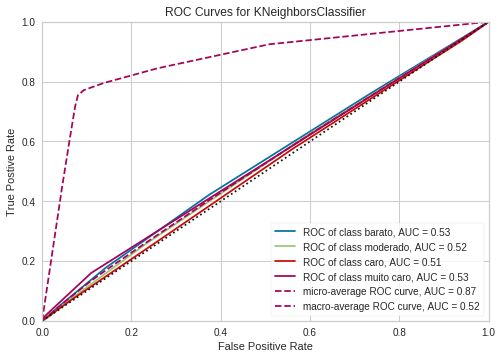

In [78]:
visualizer = ROCAUC(clf, classes=classes)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()
plt.show()

In [79]:
# Observando todos resultados, o KNN com 10 vizinhos conseguiu ser melhor que os outros
clf = KNeighborsClassifier(n_neighbors=10, n_jobs=8)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=8, n_neighbors=10, p=2,
                     weights='uniform')

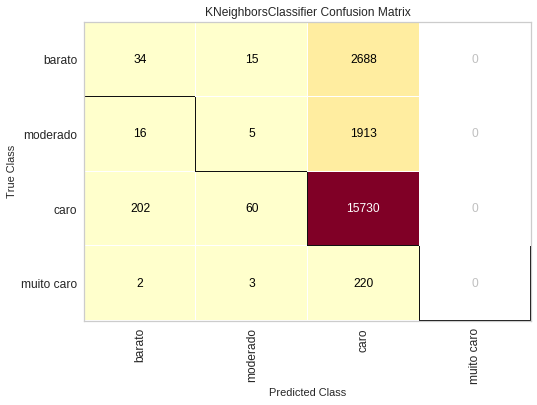

In [80]:
matriz_confusao(clf)

Saturação entre 600 e 800

In [81]:
n_neighbors = [550,570,600,610,620,630,650]
scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    #print(f"\033[94;1m *\033[m Neighbors n={n} testing finished"
    #     f", score: {scores[-1]}")

N vizinhos  550
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
N vizinhos  570
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
N vizinhos  600
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
N vizinhos  610
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
N vizinhos  620
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
N vizinhos  630
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]


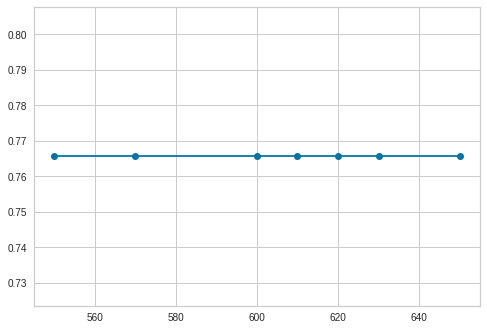

In [82]:
plt.plot(n_neighbors, scores,'-o');

Valor com maior precisão por volta de 540

<b>Weights</b>

In [83]:
weights = ['uniform', 'distance']
scores = []
for w in weights:
    clf = KNeighborsClassifier(weights = w, n_neighbors = 630, n_jobs = 8)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(w,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    #print(f"\033[94;1m *\033[m Weights: {w} testing finished"
    #     f", score: {scores[-1]}")
    print("\n")

uniform :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]


distance :
N vizinhos  650
Precisão KNN [0.04384362 0.0336091  0.93477989 0.00444444]
Recall KNN [0.14527845 0.12548263 0.76645816 0.025     ]




<b>Algorithm</b>

In [84]:
alg = ['ball_tree','kd_tree']
scores = []
for a in alg:
    clf = KNeighborsClassifier(algorithm=a,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(a,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Algorithm: {a} testing finished"
         f", score: {scores[-1]}")
    print("\n")

ball_tree :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Algorithm: ball_tree testing finished, score: 0.7656070471083876


kd_tree :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Algorithm: kd_tree testing finished, score: 0.7656070471083876




<b>leaf_size</b> default = 30

In [85]:
leaf = [5,10,20,25,30,35,40,45,50]
scores = []
for l in leaf:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               leaf_size=l,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(l,":")
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m Leaf size: {l} testing finished"
         f", score: {scores[-1]}")
    print("\n")

5 :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Leaf size: 5 testing finished, score: 0.7656070471083876


10 :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Leaf size: 10 testing finished, score: 0.7656070471083876


20 :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Leaf size: 20 testing finished, score: 0.7656070471083876


25 :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Leaf size: 25 testing finished, score: 0.7656070471083876


30 :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Leaf size: 30 testing finished, score: 0.7656070471083876


35 :
N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * Leaf size: 35 testing finished, score: 0.7656070471083

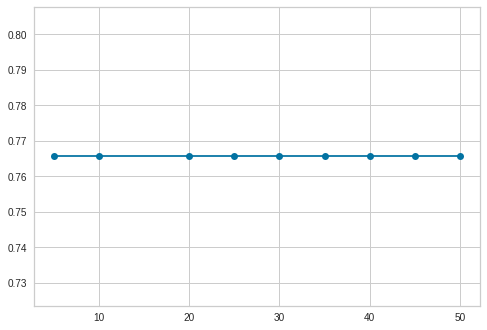

In [86]:
plt.plot(leaf,scores,'-o')

<b>Parâmetro p</b> p=1 distância manhattan, p=2 distância euclidiana

In [87]:
ps = [1,2]
scores = []
for p in ps:
    clf = KNeighborsClassifier(algorithm='ball_tree',
                               p=p,
                               leaf_size=17,
                               weights='uniform',
                               n_neighbors=630,
                               n_jobs=8)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("N vizinhos ",n)
    print("Precisão KNN",precision_score(y_pred, y_test,average=None))
    print("Recall KNN",recall_score(y_pred, y_test,average=None))
    scores.append(accuracy_score(y_pred, y_test))
    print(f"\033[94;1m *\033[m P: {p} testing finished"
         f", score: {scores[-1]}")
    print("\n")

N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * P: 1 testing finished, score: 0.7656070471083876


N vizinhos  650
Precisão KNN [0. 0. 1. 0.]
Recall KNN [0.         0.         0.76560705 0.        ]
 * P: 2 testing finished, score: 0.7656070471083876


